# Noteboook Import 

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

 # Data Points and Features

In [5]:
print(type(boston_dataset.data))
boston_dataset.data.shape

<class 'numpy.ndarray'>


(506, 13)

In [6]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with Pandas Dataframe

In [8]:
#Creating a Pandas DataFrame
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Adding column with the price (target)
data["PRICES"] = boston_dataset.target



In [9]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICES  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

## Cleaning Data

In [10]:
#Will check for any missing value in the dataset
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICES     False
dtype: bool

In [11]:
#Gives you brief information about the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Plotting the Prices on Histogram using MatplotLib

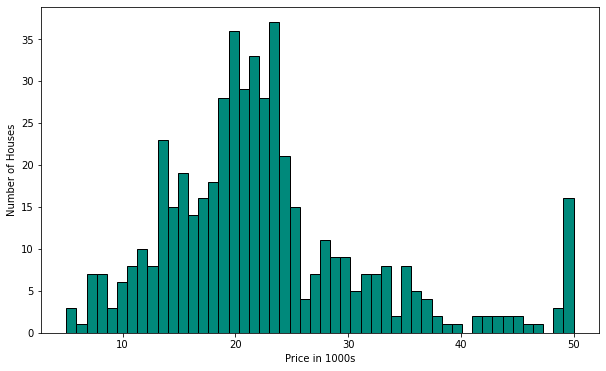

In [12]:
plt.figure(figsize=(10,6))

plt.hist(data['PRICES'], bins=50, ec="black", color="#00897b")

plt.xlabel("Price in 1000s")

plt.ylabel("Number of Houses")

plt.show()

## Plotting the same plot using Seaborn

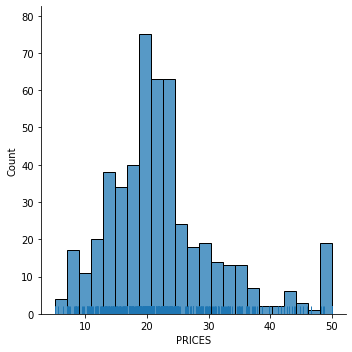

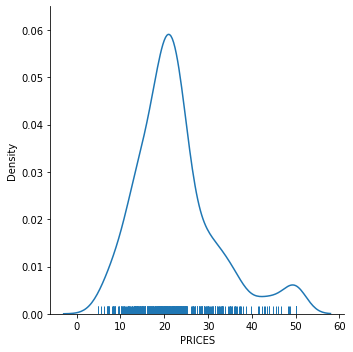

In [13]:
sns.displot(data['PRICES'], kind="hist", rug=True)
sns.displot(data['PRICES'], kind="kde", rug=True)

plt.show()

## Plotting the number of rooms on Histogram

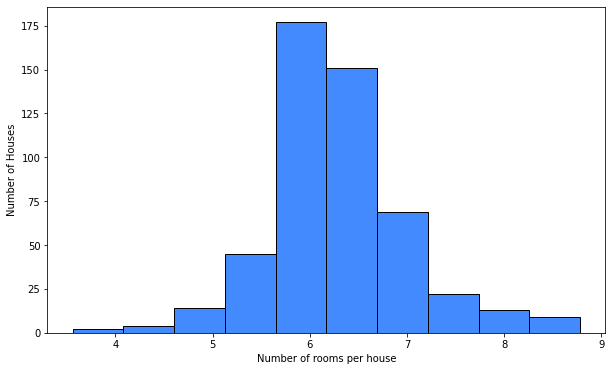

In [14]:
plt.figure(figsize=(10,6))

plt.hist(data['RM'], ec="black", color="#448aff")

plt.xlabel("Number of rooms per house")

plt.ylabel("Number of Houses")

plt.show()

## Getting the total stats from the data

In [15]:
print("The mean is",data["RM"].mean())

print("The median is",data["RM"].median())

The mean is 6.284634387351779
The median is 6.2085


## Plotting the RAD Feature on Histogram

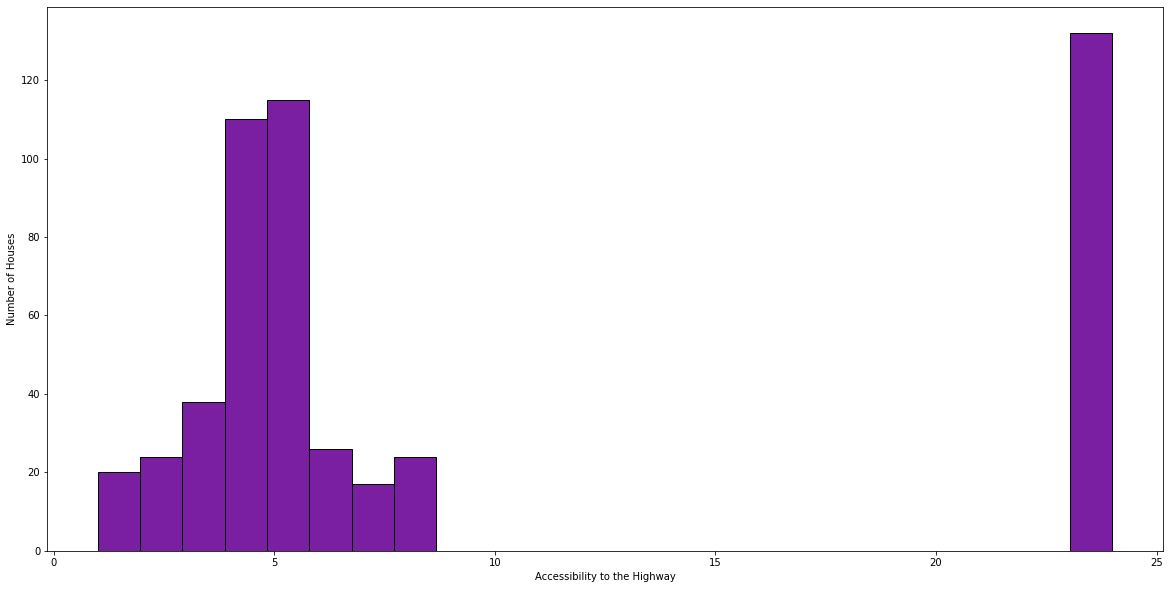

In [16]:
plt.figure(figsize=(20,10))

# The bins are set to 24 because the RAD is the index of highway accessibility 
# 1 ==> Low Accessbility to Highway
# 24 ==> High Accessibility to Highway
plt.hist(data['RAD'], bins=24, ec="black", color="#7b1fa2")

# "rwidth=0.8" argument can be used to convert this histogram into a bar chart

plt.xlabel("Accessibility to the Highway")

plt.ylabel("Number of Houses")

plt.show()

## Plotting a Bar Chart for Highway Accessibility

In [17]:
frequency = data["RAD"].value_counts()

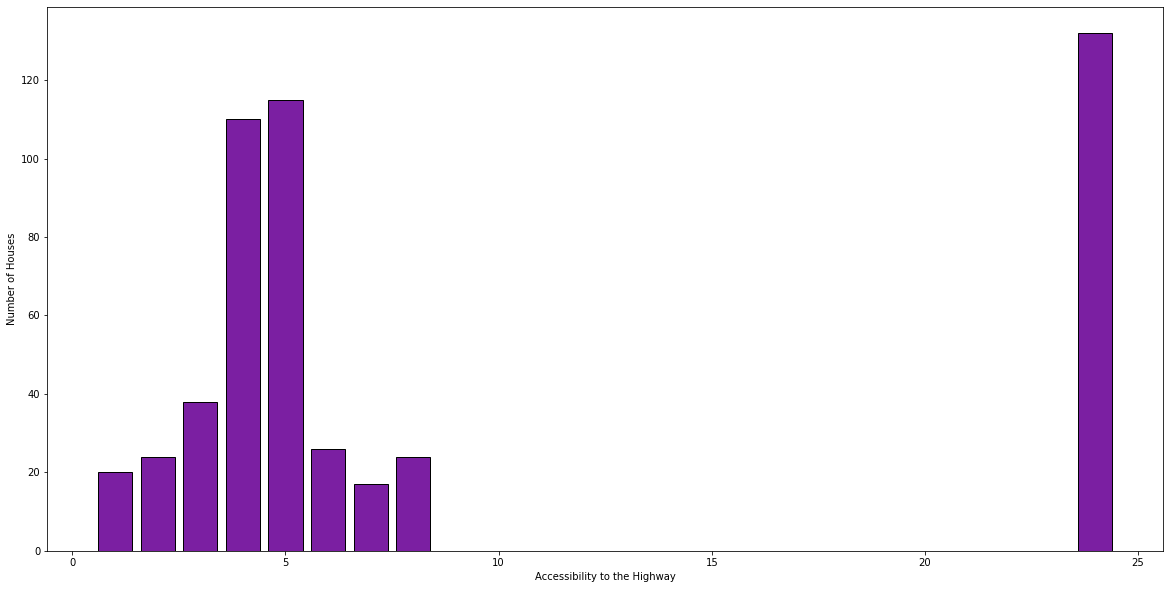

In [18]:

plt.figure(figsize=(20,10))

plt.bar(frequency.index, height=frequency, ec="black", color="#7b1fa2")

plt.xlabel("Accessibility to the Highway")

plt.ylabel("Number of Houses")

plt.show()


## How many houses are located at the Colorado River ?

### Ans : 35
(As we can see in the stats below, 1 means touches the river and 0 means not touching the river)

In [19]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics of the data

In [20]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      PRICES  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$

## $$  -1.0 \leq \rho _{XY} \leq 1.0 $$
 

In [21]:
# Gives the correlation between the prices and the number of rooms
data['PRICES'].corr(data['RM'])

0.6953599470715396

In [22]:
# Gives the correlation between the prices and the pupil-teacher ratio
data['PRICES'].corr(data['PTRATIO'])

-0.5077866855375618

In [23]:
# Gives the Pearson correlation between every data
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICES  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    PRICES  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICES   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

### Creating a mask for Heatmap for Data Correlation Chart

In [24]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True


## Heatmap for the Data Correlation 

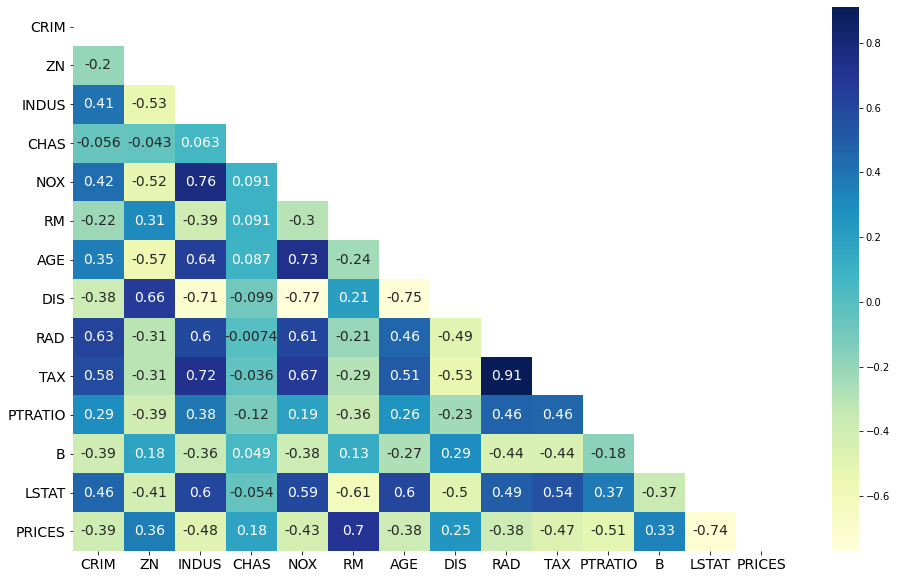

In [25]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(), annot=True, mask=mask, annot_kws={"size": 14}, cmap="YlGnBu")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Scatter plot between NOX and DIS

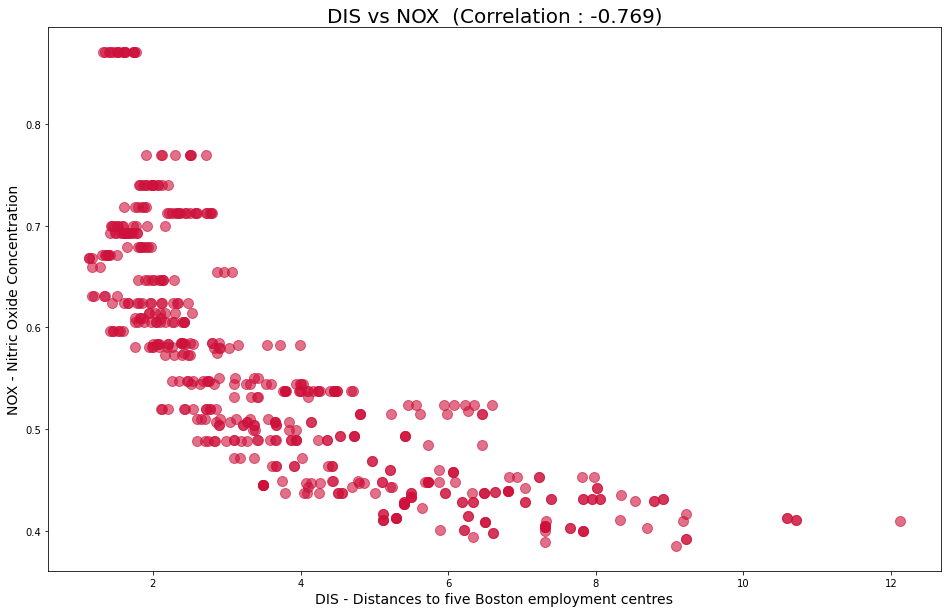

In [26]:
plt.figure(figsize=(16,10))
dis_nox_corr = round(data['DIS'].corr(data['NOX']),3)

plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=100, color='#CD113B')
plt.title(f"DIS vs NOX  (Correlation : {dis_nox_corr})", fontsize=20)
plt.xlabel("DIS - Distances to five Boston employment centres", fontsize=14)
plt.ylabel("NOX - Nitric Oxide Concentration",fontsize=14)

plt.show()

## Joint Scatter plot between NOX and DIS using Seaborn 
(Showing different kind of scatter plot)

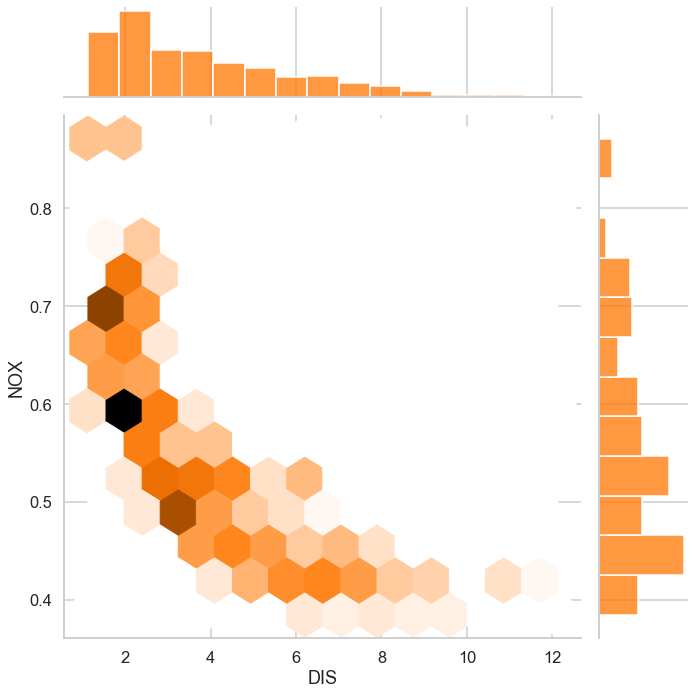

In [27]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color="#FF7600", kind="hex", height=10)
plt.show()

## Scatter Plot between TAX and RAD

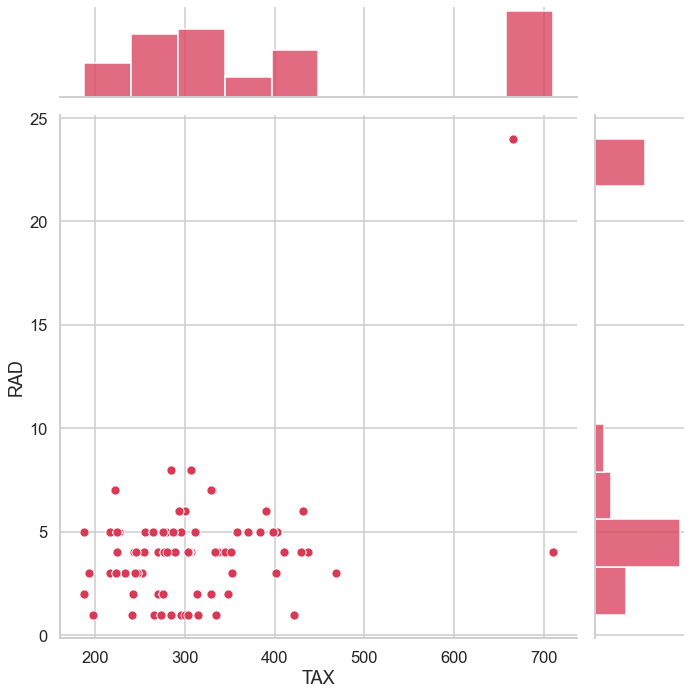

In [28]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], color="#D83A56", height=10)
plt.show()

## Linear Regression between TAX and RAD

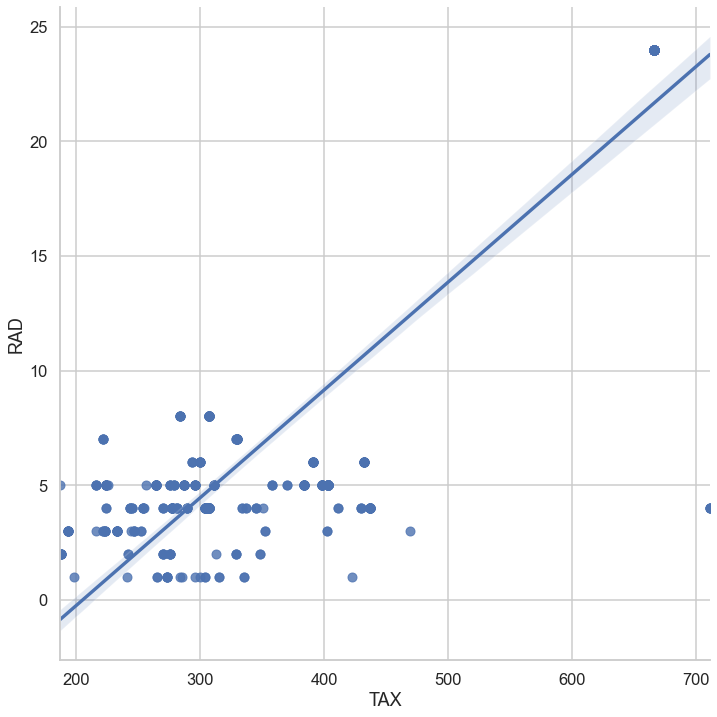

In [29]:
sns.lmplot(x='TAX', y='RAD', data=data, height=10)

plt.show()

## Scatter Plot between House Prices and Number of Rooms

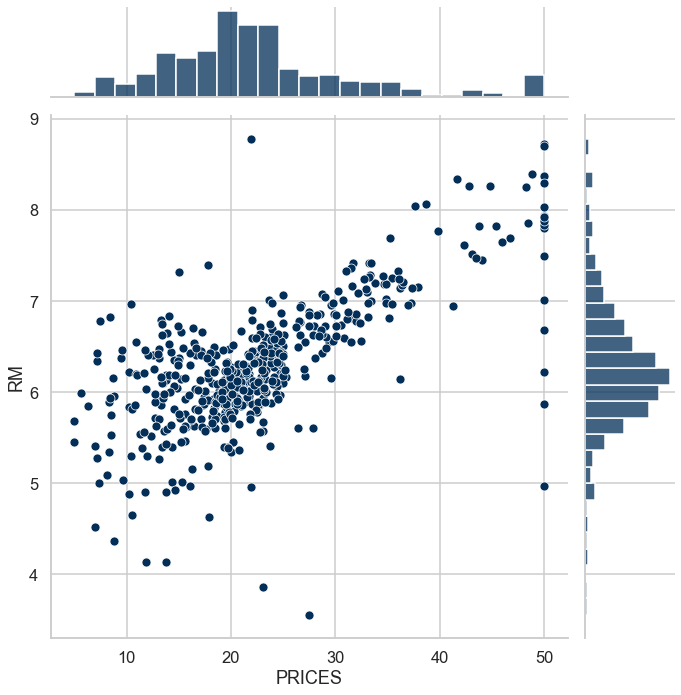

In [30]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['PRICES'], y=data['RM'], color="#022E57", height=10)
plt.show()

## Pairplot by Seaborn

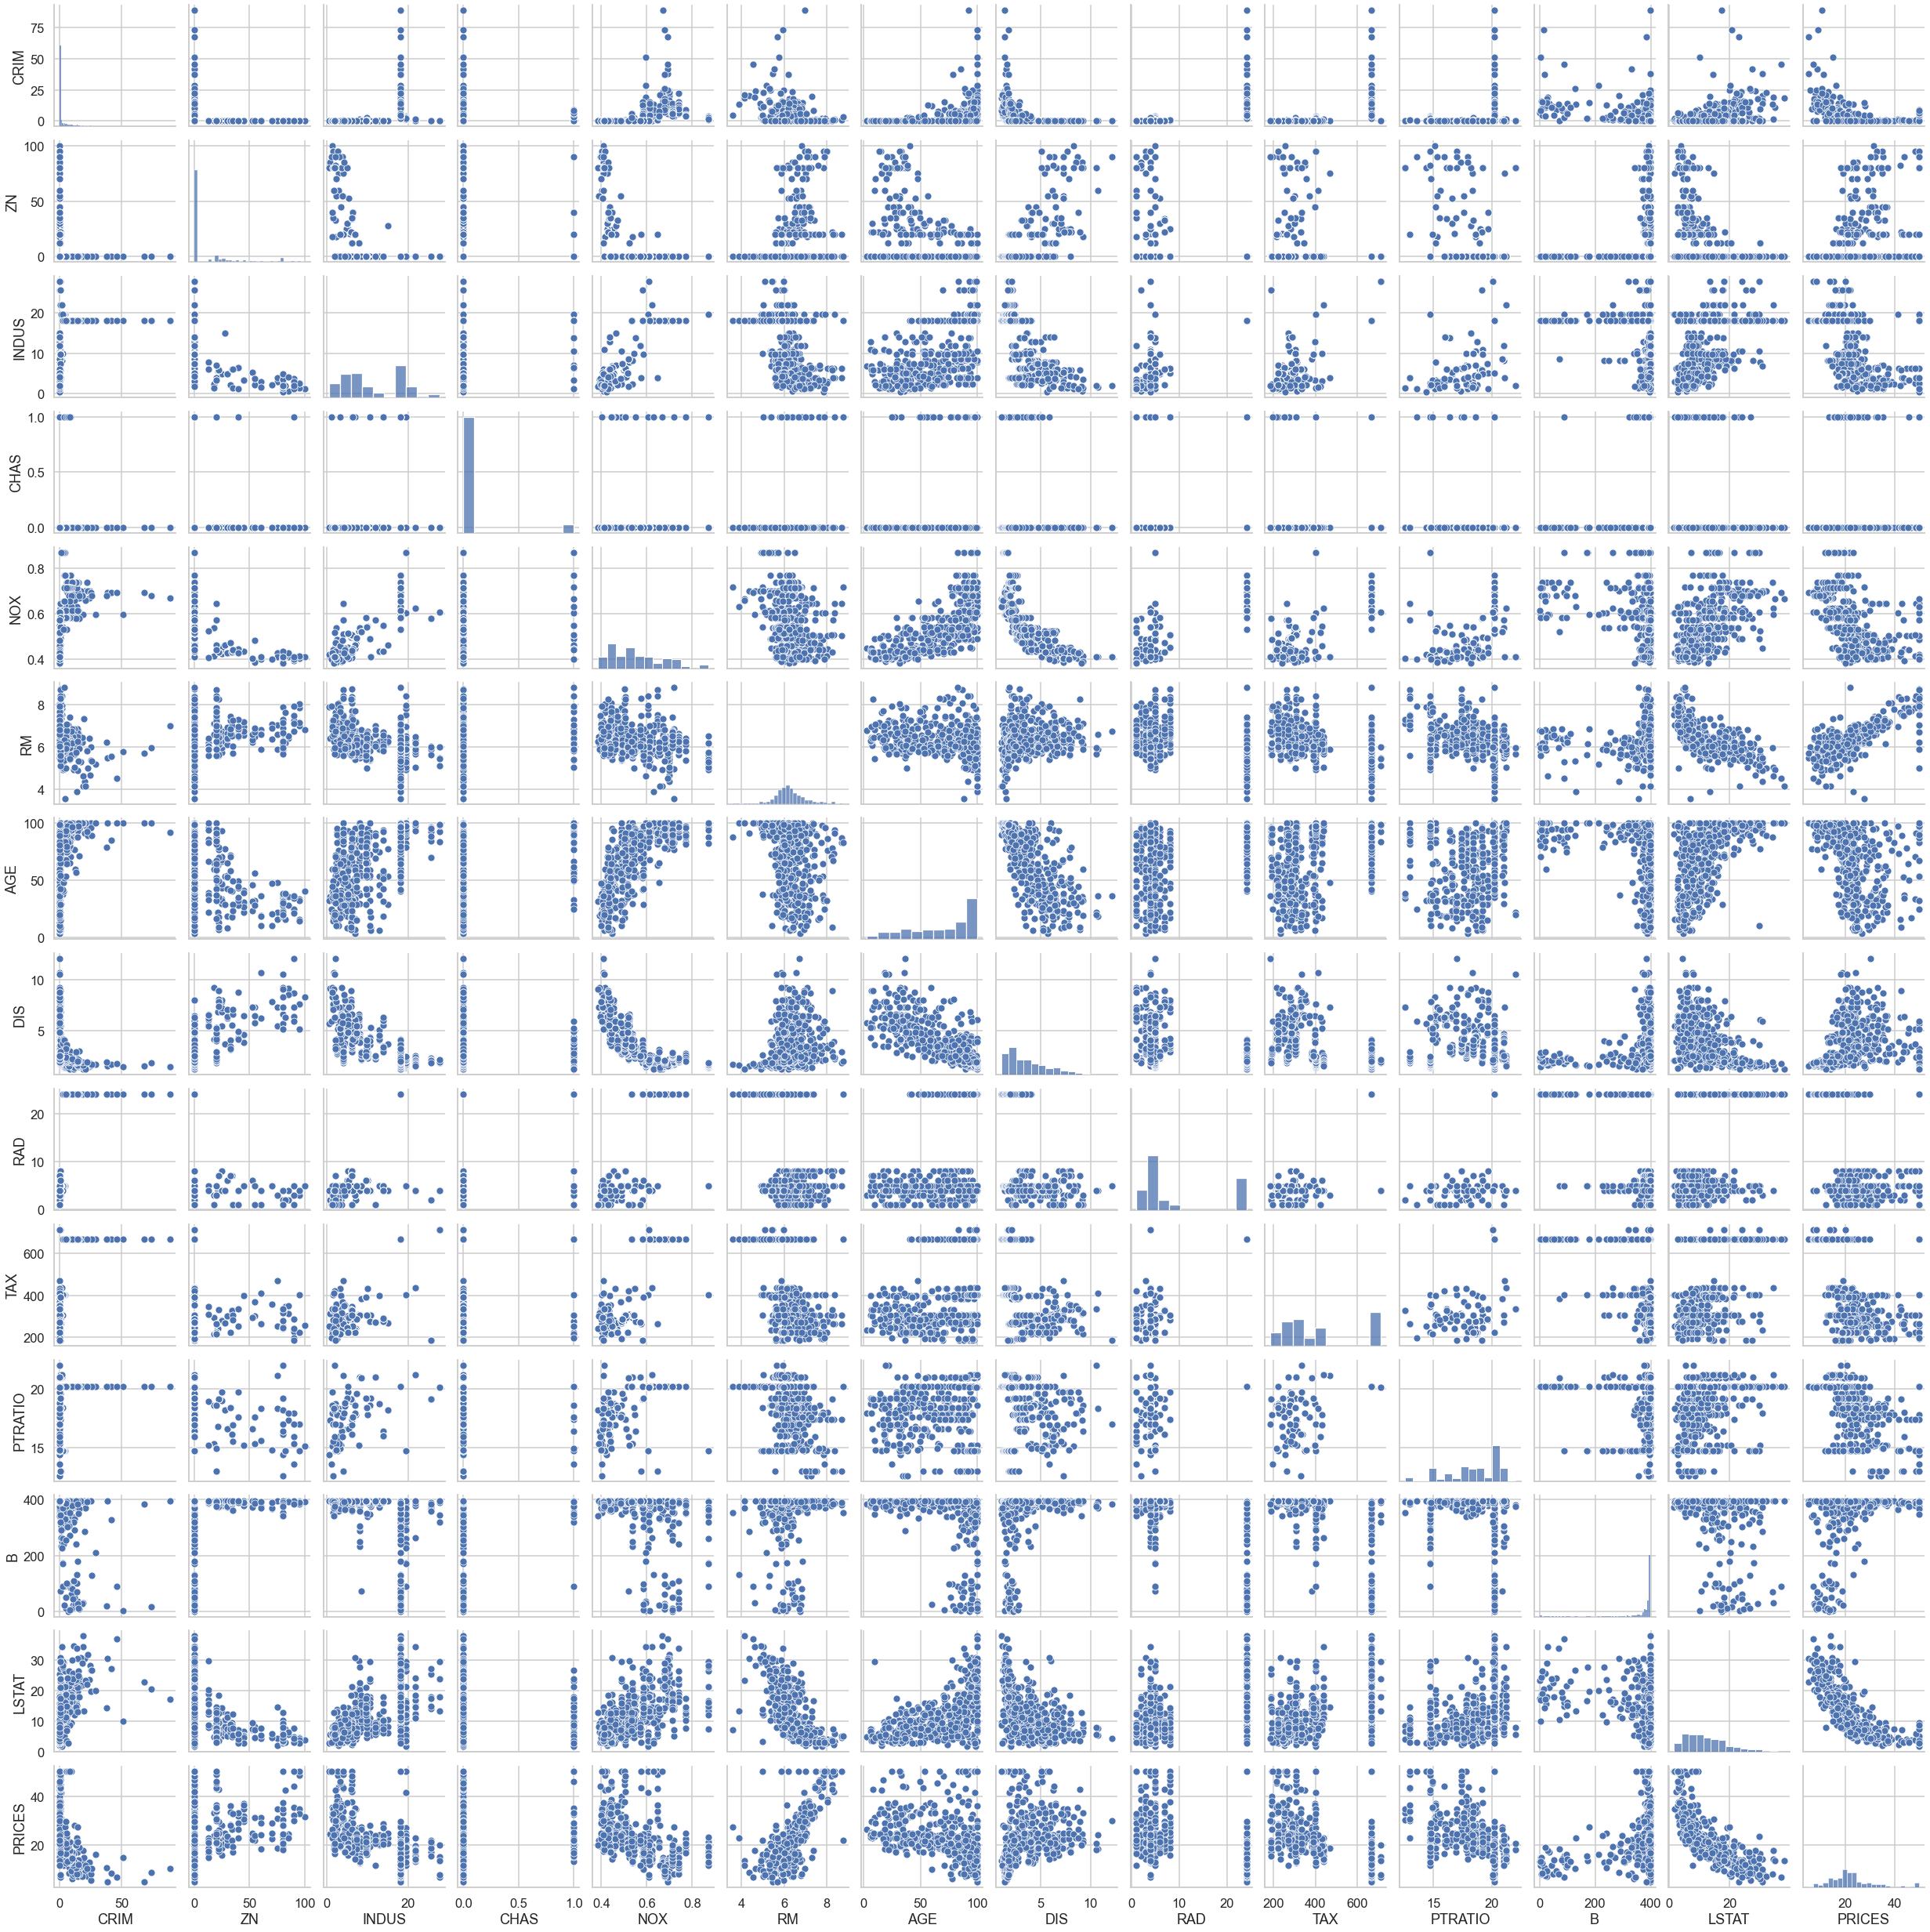

Wall time: 20.9 s


In [31]:
%%time

sns.pairplot(data)
plt.show()

## Pairplot with Regression Line by Seaborn

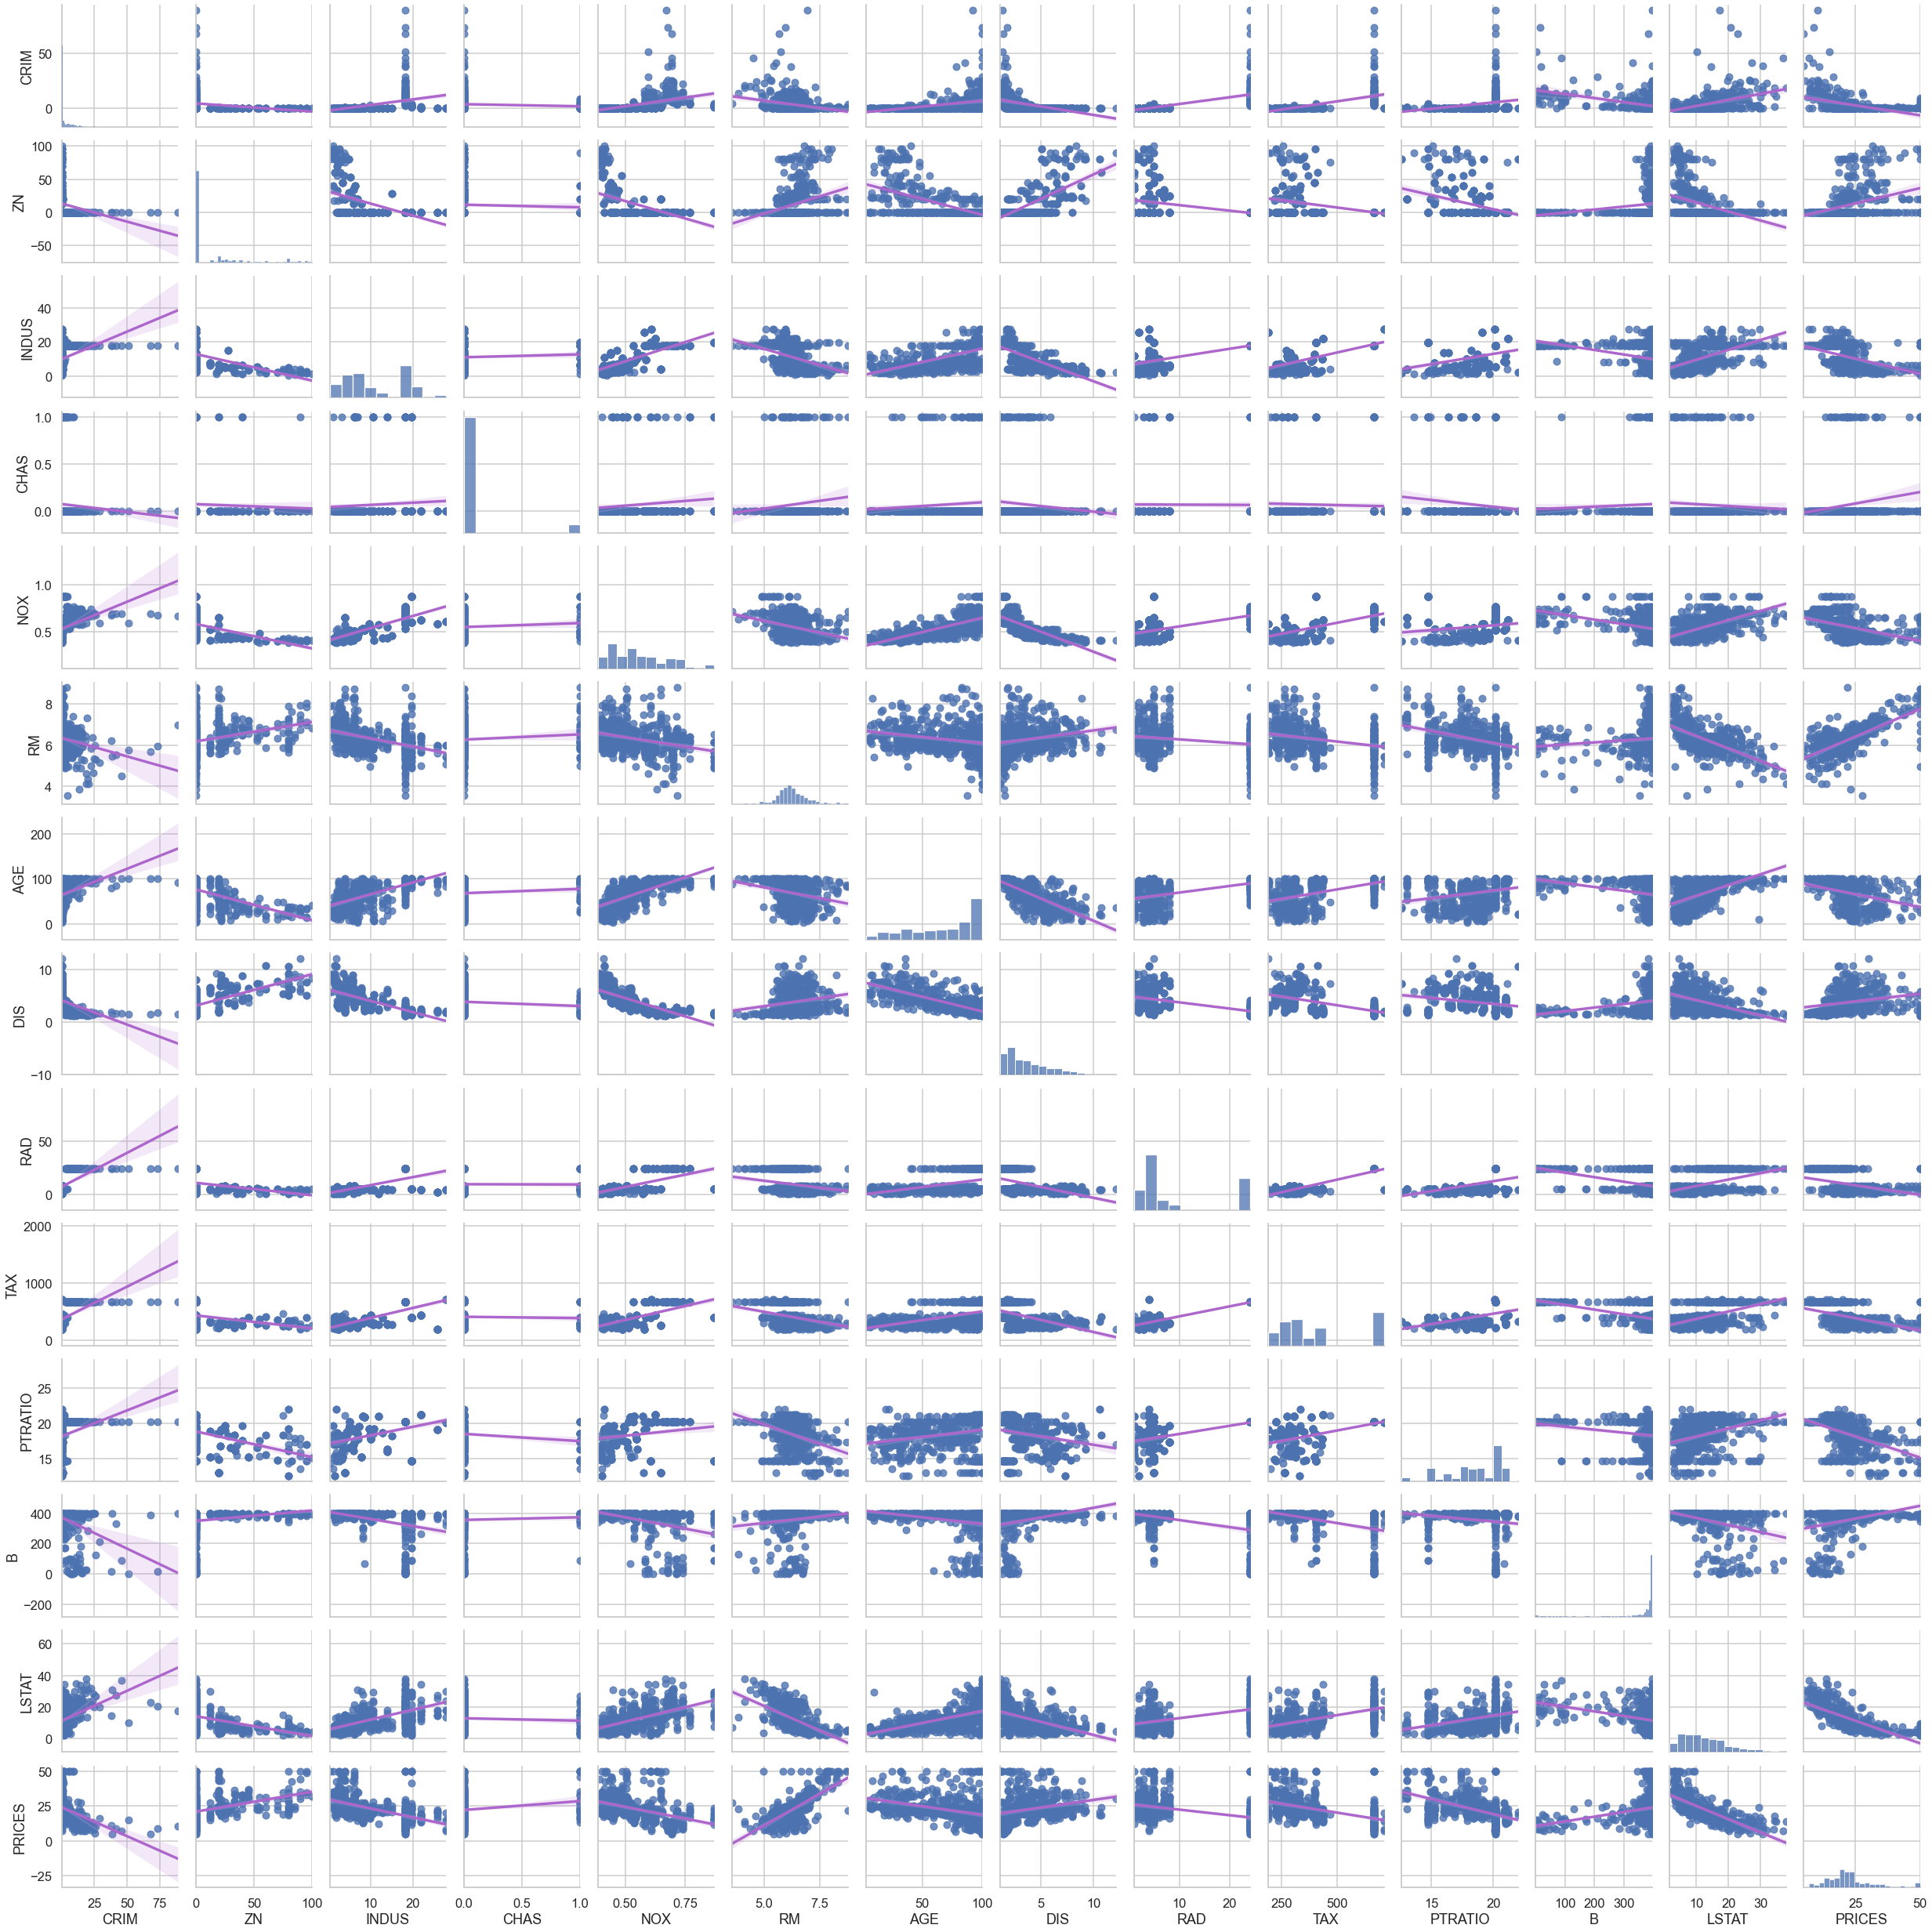

Wall time: 33.6 s


In [32]:
%%time

sns.pairplot(data, kind="reg", plot_kws={"line_kws":{"color":"#AC66CC"}})
plt.show()

## Train/Test Split using Scikit Learn

In [33]:
prices = data['PRICES']
features = data.drop('PRICES', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


## Multivariable Regression

In [34]:
regr = LinearRegression()

regr.fit(X_train, y_train)

print("Intercept : ", regr.intercept_)

print("R-Squared on Training Data : ", regr.score(X_train, y_train))
print("R-Squared on Test Data : ", regr.score(X_test, y_test))

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept :  36.53305138282418
R-Squared on Training Data :  0.750121534530608
R-Squared on Test Data :  0.6709339839115636


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Multivariable Regression with Log Prices

In [35]:
prices = np.log(data['PRICES'])
features = data.drop('PRICES', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()

regr.fit(X_train, y_train)

print("Intercept : ", regr.intercept_)

print("R-Squared on Training Data : ", regr.score(X_train, y_train))
print("R-Squared on Test Data : ", regr.score(X_test, y_test))

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept :  4.059943871775182
R-Squared on Training Data :  0.7930234826697584
R-Squared on Test Data :  0.7446922306260724


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

## p Values and Evaluating Coefficients

In [36]:
X_iucl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_iucl_const)

result = model.fit()



## Variance Inflation Factor

$$ VIF = \frac {1}{1 - R^2} $$
where $R$ is the Residual Sum of Square,  $VIF \gt 10 $ implies there is multicollinearity in the data

### For this dataset : 
$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$




In [37]:

# The exog only takes ndarray but the X_incl_const_values is a dataframe, 
# so adding .values at the end converts it to the ndarray

vif = [variance_inflation_factor(exog=X_iucl_const.values, exog_idx=i) for i in range(X_iucl_const.shape[1])]
# The above line and the bottom commmented line have the same meaning
# for i in range(X_iucl_const.shape[1]):
#     vif.append(variance_inflation_factor(exog=X_iucl_const.values, exog_idx=i))

originalmodel = pd.DataFrame({"coef":result.params, "pvalues":round(result.pvalues, 3), "vif":np.around(vif, 3)})


## Reduced Model excluding INDUS

In [38]:
#Reduced Model #1 excluding INDUS

X_iucl_const = sm.add_constant(X_train)
X_iucl_const = X_iucl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_iucl_const)

result = model.fit()

reduced_coef1 = pd.DataFrame({"coef":result.params, "pvalues":round(result.pvalues, 3)})

vif = [variance_inflation_factor(exog=X_iucl_const.values, exog_idx=i) for i in range(X_iucl_const.shape[1])]

print("BIC is", result.bic)
print("R-Squared is", result.rsquared)

reduced1 = pd.DataFrame({"coef":result.params, "pvalues":round(result.pvalues, 3), "vif":np.around(vif, 3)})

BIC is -145.14508855591185
R-Squared is 0.7927126289415163


## Reduced Model excluding INDUS & AGE

In [39]:
#Reduced Model #2 excluding INDUS & AGE

X_iucl_const = sm.add_constant(X_train)
X_iucl_const = X_iucl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_iucl_const)

result = model.fit()

reduced_coef2 = pd.DataFrame({"coef":result.params, "pvalues":round(result.pvalues, 3)})

vif = [variance_inflation_factor(exog=X_iucl_const.values, exog_idx=i) for i in range(X_iucl_const.shape[1])]

print("BIC is", result.bic)
print("R-Squared is", result.rsquared)

reduced2 = pd.DataFrame({"coef":result.params, "pvalues":round(result.pvalues, 3), "vif":np.around(vif, 3)})

BIC is -149.49934294224678
R-Squared is 0.7918657661852815


## Concatenating results of Different Model

In [40]:
frames = [originalmodel, reduced1, reduced2]
pd.concat(frames, axis=1)

coef  pvalues      vif      coef  pvalues      vif      coef  \
const    4.059944    0.000  597.549  4.056231    0.000  597.276  4.035922   
CRIM    -0.010672    0.000    1.715 -0.010721    0.000    1.710 -0.010702   
ZN       0.001579    0.009    2.333  0.001551    0.010    2.324  0.001461   
INDUS    0.002030    0.445    3.943       NaN      NaN      NaN       NaN   
CHAS     0.080331    0.038    1.079  0.082795    0.032    1.071  0.086449   
NOX     -0.704068    0.000    4.410 -0.673365    0.000    4.152 -0.616448   
RM       0.073404    0.000    1.840  0.071739    0.000    1.816  0.076133   
AGE      0.000763    0.209    3.327  0.000766    0.207    3.327       NaN   
DIS     -0.047633    0.000    4.223 -0.049394    0.000    3.945 -0.052692   
RAD      0.014565    0.000    7.314  0.014014    0.000    6.836  0.013743   
TAX     -0.000645    0.000    8.509 -0.000596    0.000    7.121 -0.000590   
PTRATIO -0.034795    0.000    1.840 -0.034126    0.000    1.799 -0.033481   
B        0.000516    0.000    1.339  0.000511    0.000    1.334  0.000518   
LSTAT   -0.031390    0.000    2.813 -0.031262    0.000    2.796 -0.030271   

         pvalues      vif  
const      0.000  594.280  
CRIM       0.000    1.710  
ZN         0.014    2.291  
INDUS        NaN      NaN  
CHAS       0.025    1.065  
NOX        0.000    3.827  
RM         0.000    1.753  
AGE          NaN      NaN  
DIS        0.000    3.587  
RAD        0.000    6.794  
TAX        0.000    7.114  
PTRATIO    0.000    1.786  
B          0.000    1.331  
LSTAT      0.000    2.442

## Residual and Residual Plots

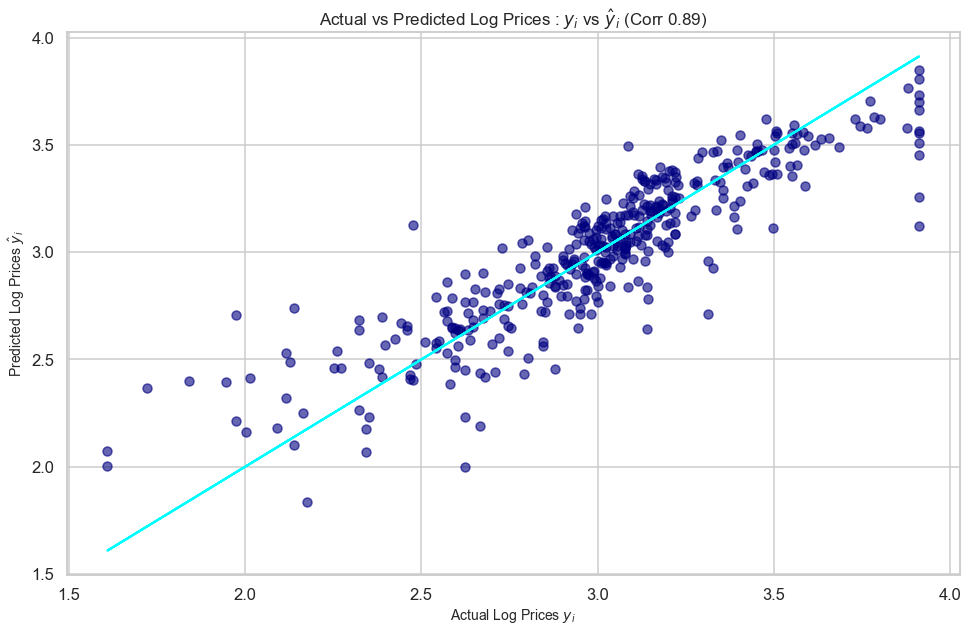

In [41]:
prices = np.log(data['PRICES'])
features = data.drop(['PRICES', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

#Graph of Actual vs Predicted Model
corr = round(y_train.corr(result.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=y_train, y=result.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y _i$', fontsize=14)

plt.title(f'Actual vs Predicted Log Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()


## Residual and Residual Plots between actual Prices and Predicted Price

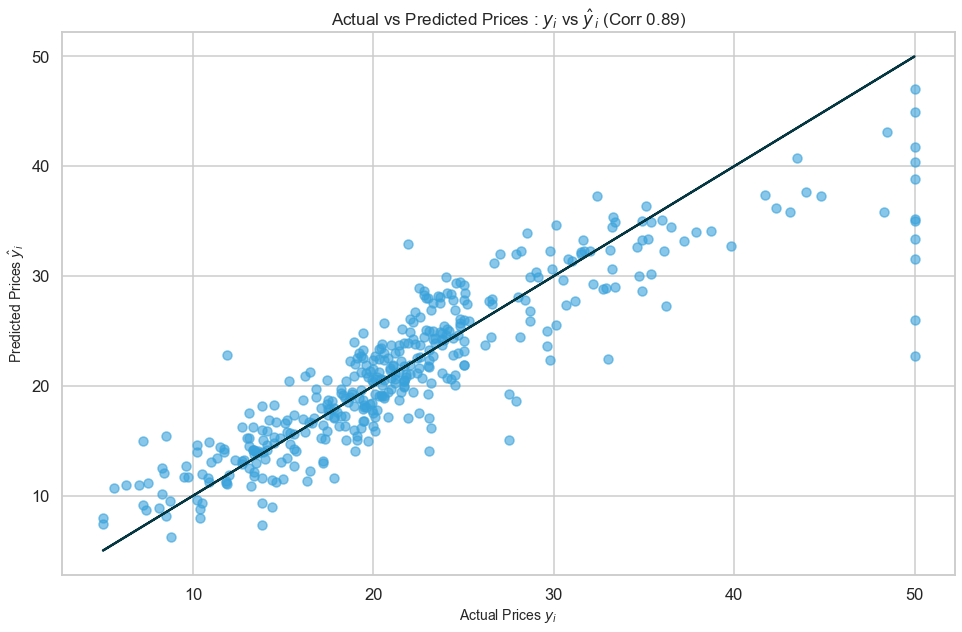

In [42]:
plt.figure(figsize=(16,10))

plt.scatter(x=np.e**y_train, y=np.e**result.fittedvalues, c="#39A2DB", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='#053742')

plt.xlabel('Actual Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Prices $\hat y _i$', fontsize=14)

plt.title(f'Actual vs Predicted Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

## Distribution of Residuals

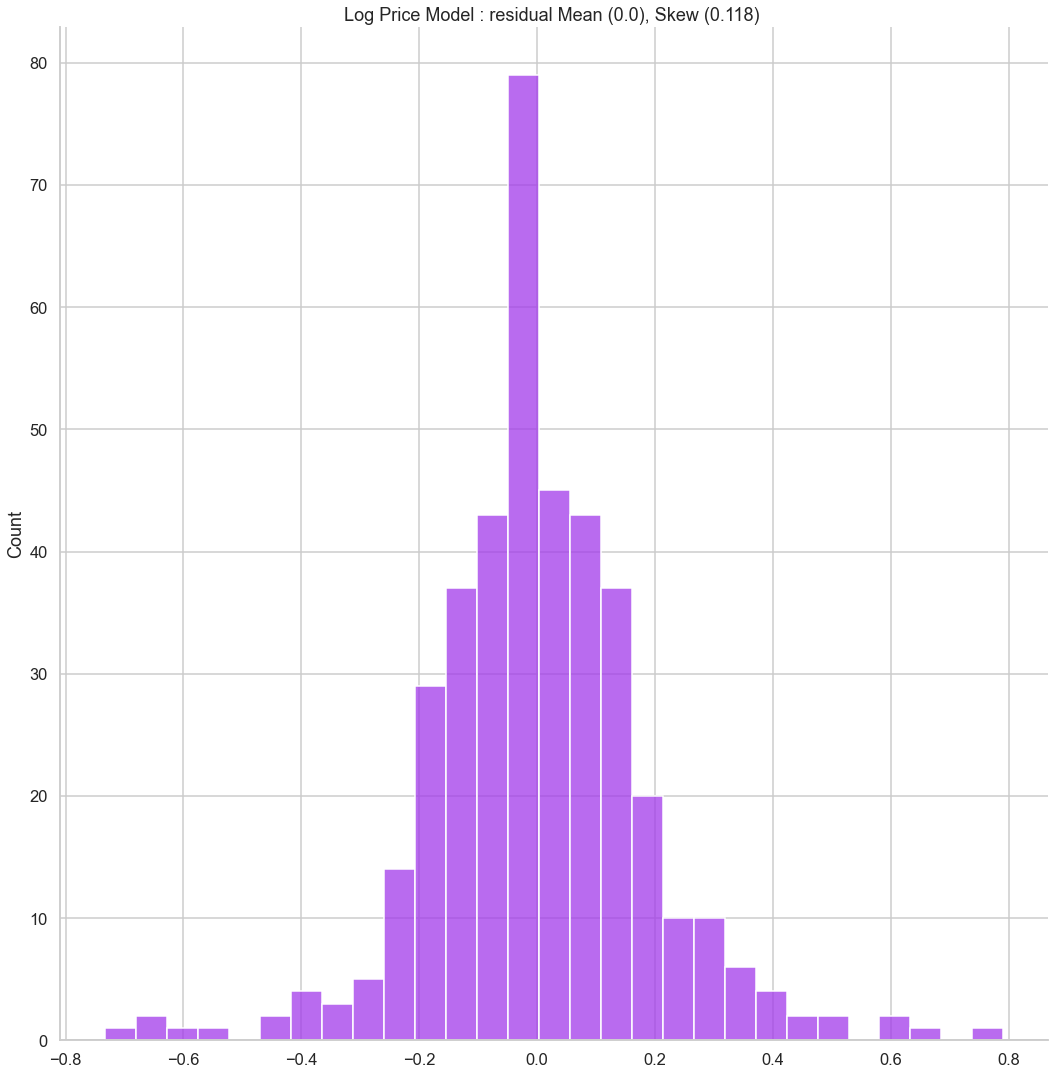

In [43]:
resid_mean = round(result.resid.mean(), 3)
resid_skew = round(result.resid.skew(), 3)

sns.displot(result.resid, color='#A239EA', height=15)
plt.title(f'Log Price Model : residual Mean ({resid_mean}), Skew ({resid_skew}) ')
plt.show()

## Full Normal Price Model

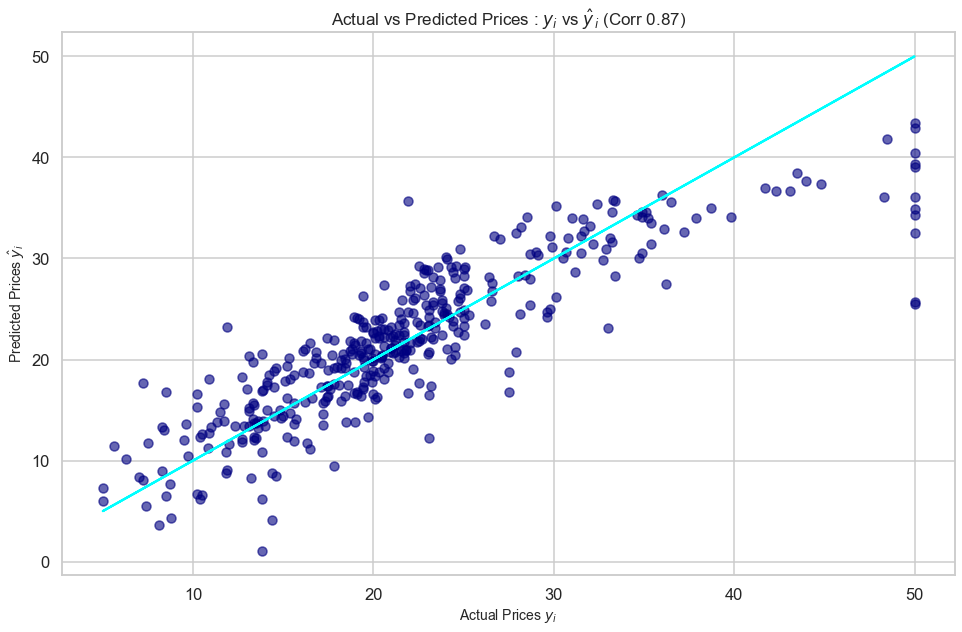

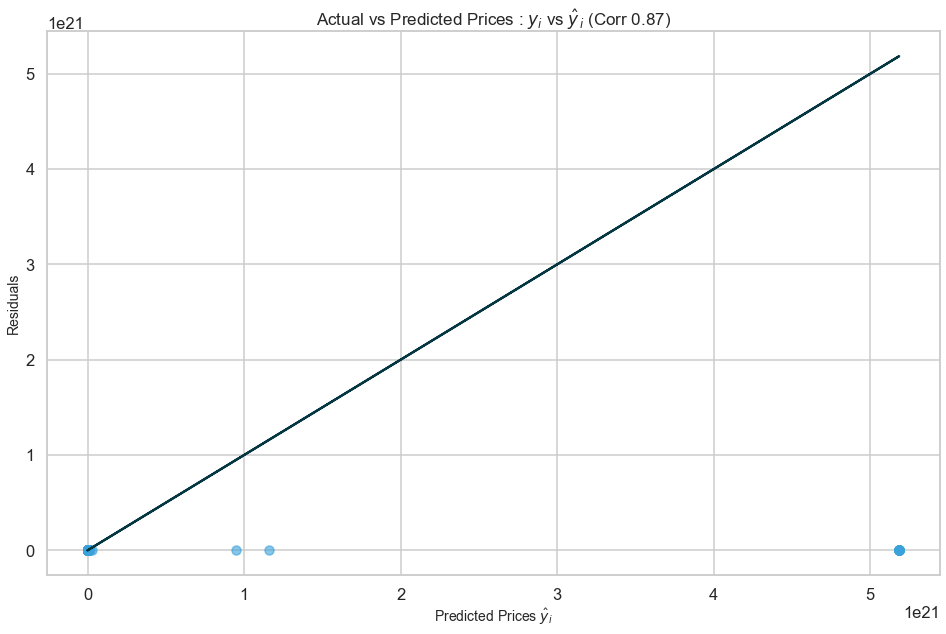

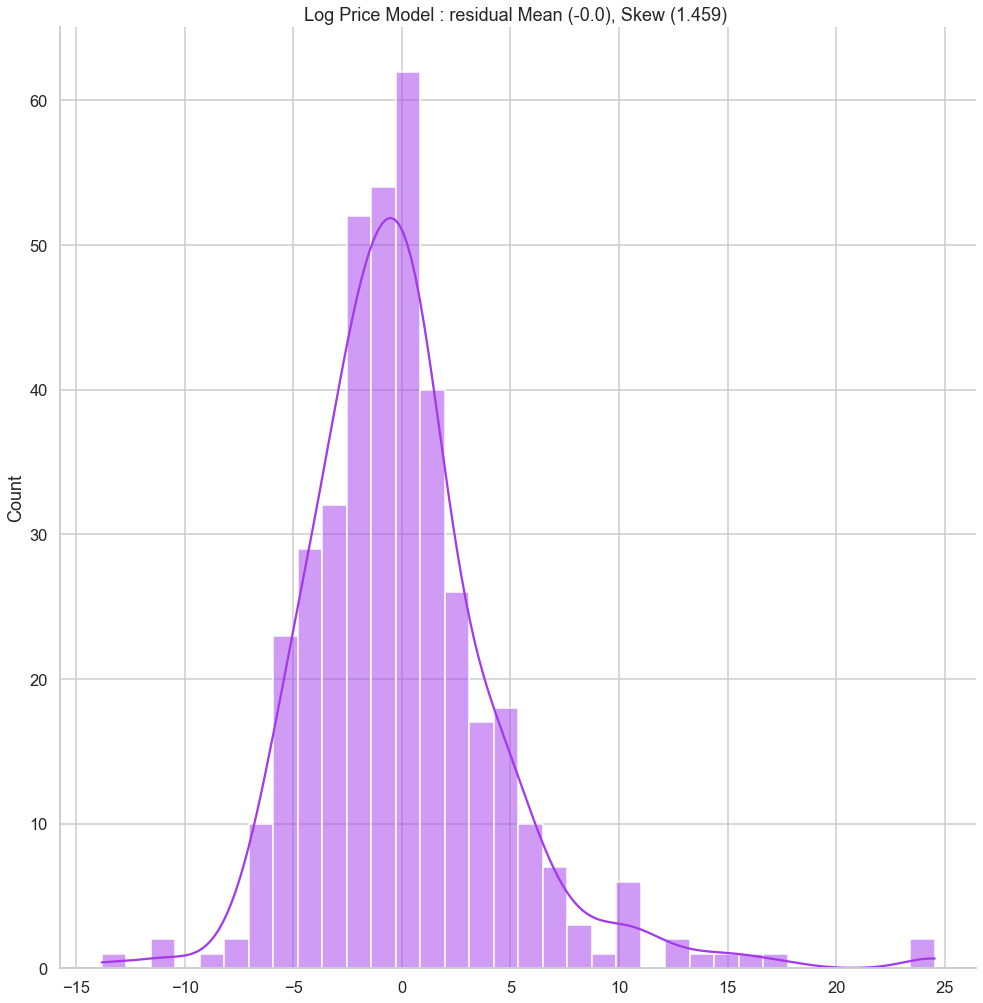

In [44]:
prices = (data['PRICES'])
features = data.drop(['PRICES'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

# Mean Squared Error & R-Squared
full_normal_mse = round(result.mse_resid, 3)
full_normal_rsquared = round(result.rsquared, 3)

#Graph of Actual Log Prices vs Predicted Log Prices
corr = round(y_train.corr(result.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=y_train, y=result.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Prices $\hat y _i$', fontsize=14)

plt.title(f'Actual vs Predicted Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

#Graph of Actual Prices vs Predicted Prices
plt.figure(figsize=(16,10))

plt.scatter(x=np.e**y_train, y=np.e**result.fittedvalues, c="#39A2DB", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='#053742')

plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.title(f'Actual vs Predicted Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

#Price Model showing Residual Mean and Skewnwss
sns.displot(result.resid, color='#A239EA', height=14, kde=True)

plt.title(f'Log Price Model : residual Mean ({round(result.resid.mean(), 3)}), Skew ({round(result.resid.skew(), 3)}) ')
plt.show()



## Reduced Log Model

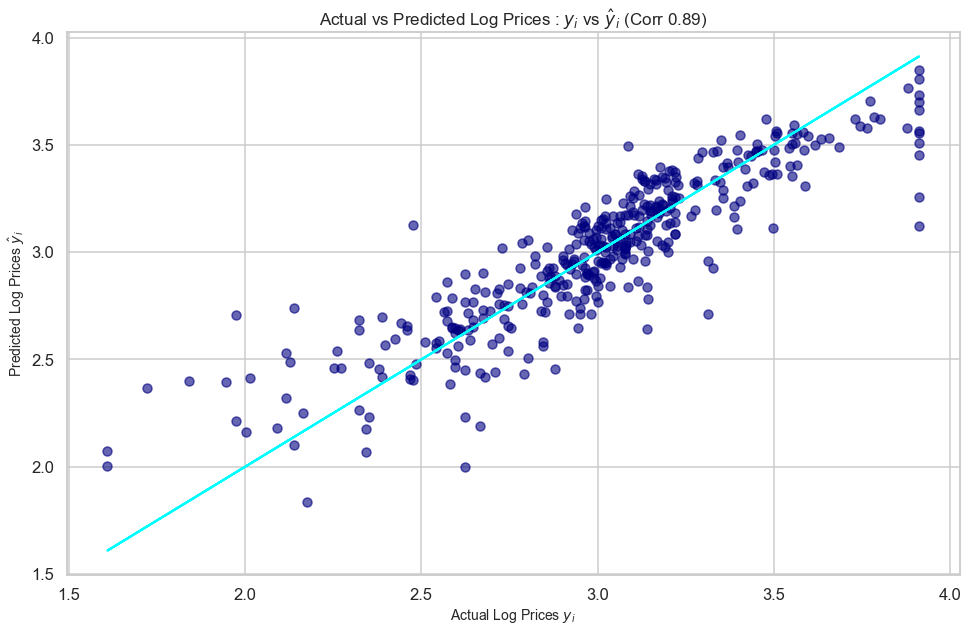

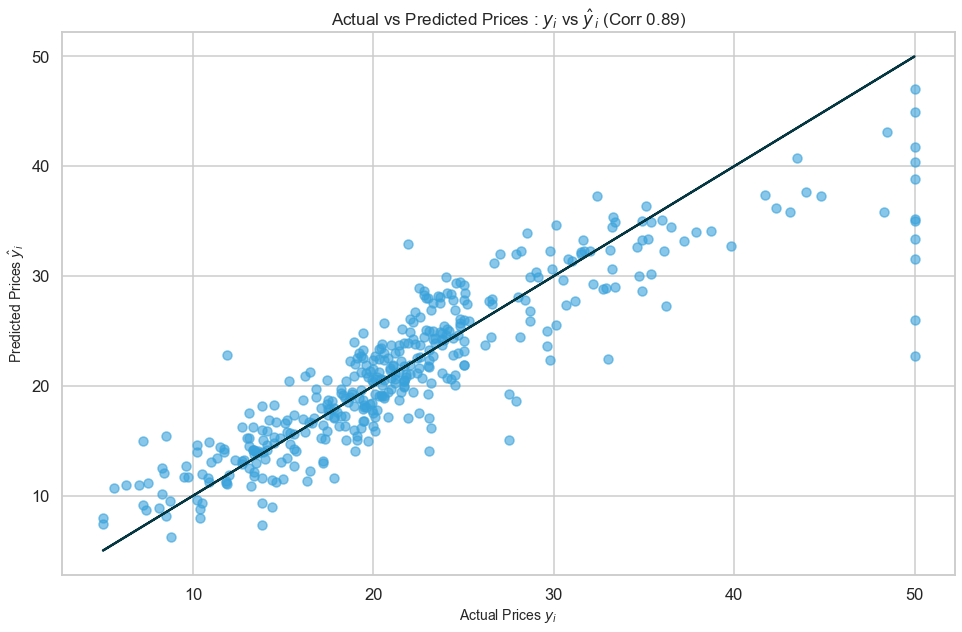

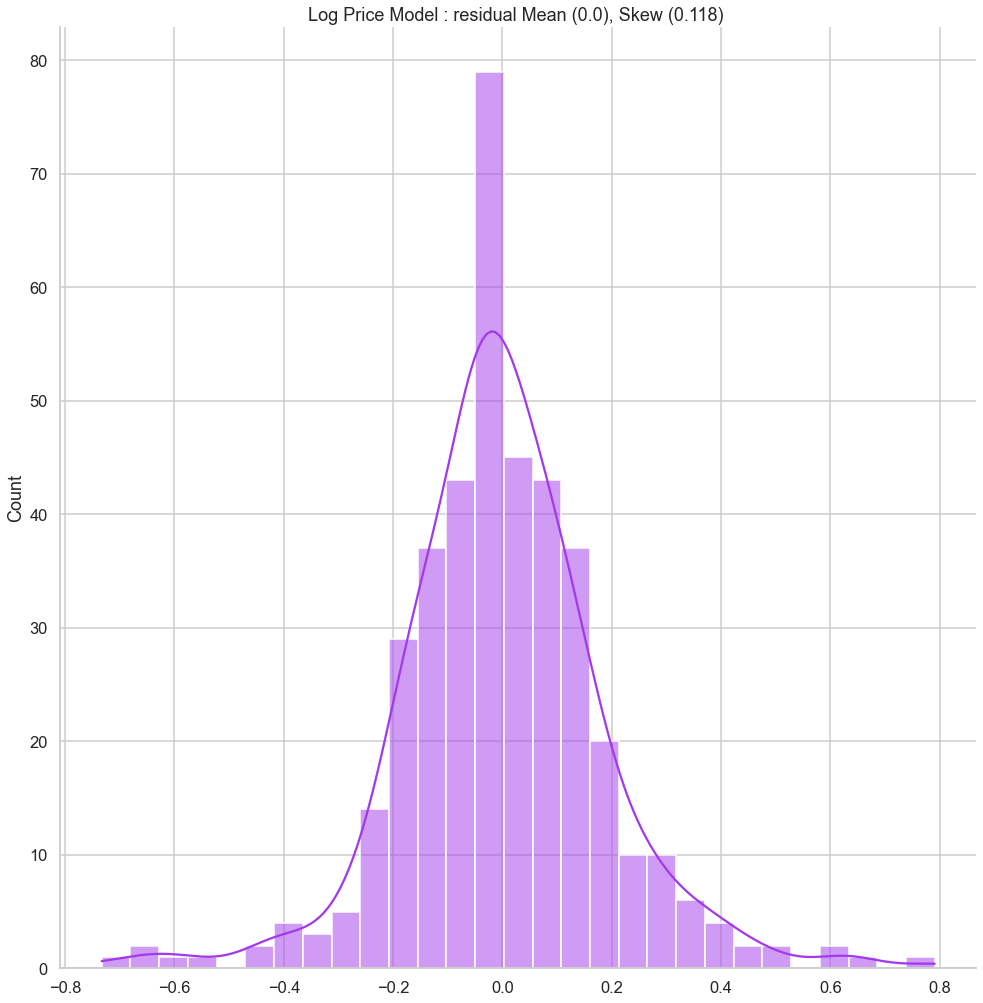

In [45]:
prices = np.log(data['PRICES'])
features = data.drop(['PRICES', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

# Mean Squared Error & R-Squared
reduced_log_mse = round(result.mse_resid, 3)
reduced_log_rsquared = round(result.rsquared, 3)

#Graph of Actual Log Prices vs Predicted Log Prices
corr = round(y_train.corr(result.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=y_train, y=result.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y _i$', fontsize=14)

plt.title(f'Actual vs Predicted Log Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

#Graph of Actual Prices vs Predicted Prices
plt.figure(figsize=(16,10))

plt.scatter(x=np.e**y_train, y=np.e**result.fittedvalues, c="#39A2DB", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='#053742')

plt.xlabel('Actual Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Prices $\hat y _i$', fontsize=14)

plt.title(f'Actual vs Predicted Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

#Price Model showing Residual Mean and Skewnwss
sns.displot(result.resid, color='#A239EA', height=14, kde=True)

plt.title(f'Log Price Model : residual Mean ({round(result.resid.mean(), 3)}), Skew ({round(result.resid.skew(), 3)}) ')
plt.show()



## Ommited Price Model

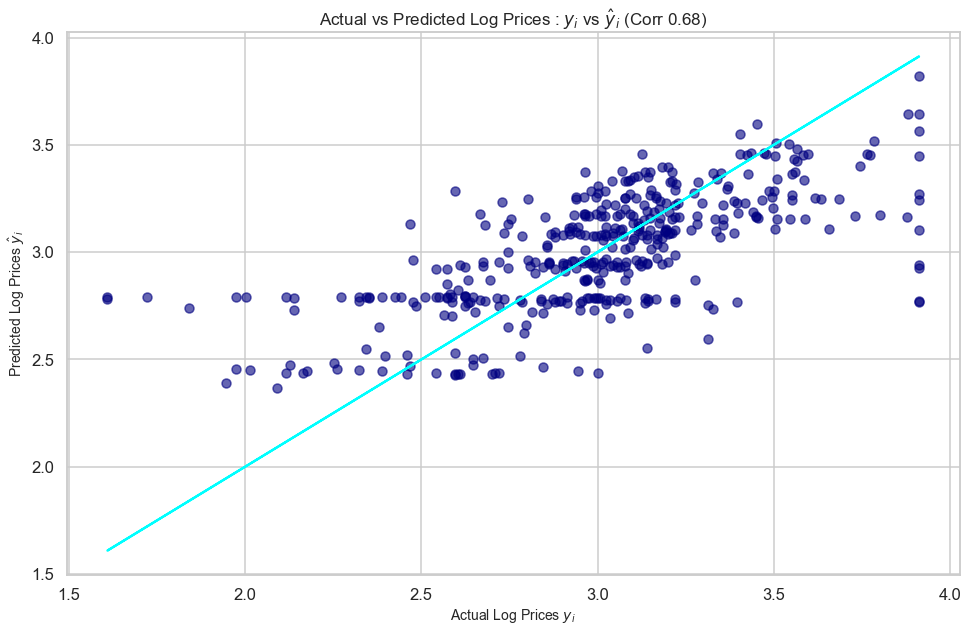

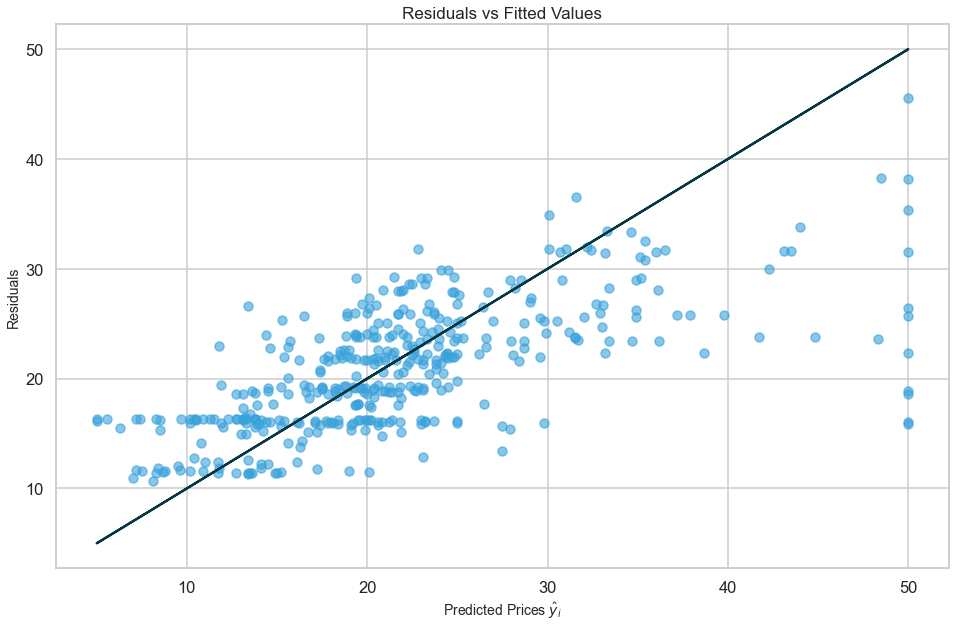

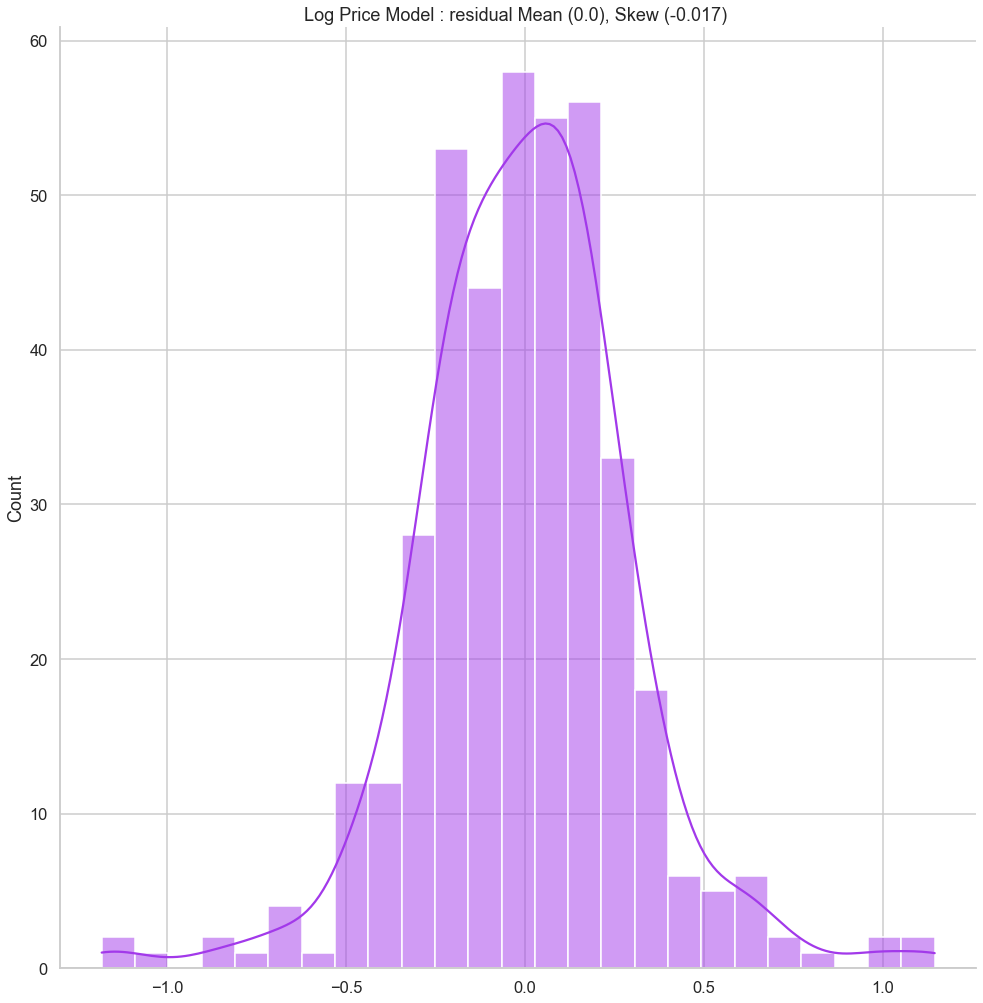

In [46]:
prices = np.log(data['PRICES'])
features = data.drop(['PRICES', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

# Mean Squared Error & R-Squared
omitted_var_mse = round(result.mse_resid, 3)
omitted_var_rsquared = round(result.rsquared, 3)

#Graph of Actual Log Prices vs Predicted Log Prices
corr = round(y_train.corr(result.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=y_train, y=result.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y _i$', fontsize=14)

plt.title(f'Actual vs Predicted Log Prices : $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

#Graph of Actual Prices vs Predicted Prices
plt.figure(figsize=(16,10))

plt.scatter(x=np.e**y_train, y=np.e**result.fittedvalues, c="#39A2DB", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='#053742')

plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.title(f'Residuals vs Fitted Values', fontsize=17)

plt.show()

#Price Model showing Residual Mean and Skewnwss
sns.displot(result.resid, color='#A239EA', height=14, kde=True)

plt.title(f'Log Price Model : residual Mean ({round(result.resid.mean(), 3)}), Skew ({round(result.resid.skew(), 3)}) ')
plt.show()

## Finalized Table

In [47]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Model            0.460   0.090  0.300000

## Upper Bound and Lower Bound

In [48]:
print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155
